# Ładowanie bibliotek

In [49]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession

warnings.filterwarnings("ignore")
spark = SparkSession.builder.getOrCreate()

# Zadanie 1

In [50]:
data = pd.read_csv("countries of the world.csv", sep = ",")
# print(df.head())
print(data.columns)

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


In [51]:
# data processing
data['GDP ($ per capita)'] = pd.to_numeric(data['GDP ($ per capita)'], errors='coerce')
data['Birthrate'] = pd.to_numeric(data['Birthrate'].str.replace(',', '.'), errors='coerce')
data['Deathrate'] = pd.to_numeric(data['Deathrate'].str.replace(',', '.'), errors='coerce')

In [52]:
# sorting GDP
data_sorted = data.sort_values('GDP ($ per capita)', ascending=False)

# top 30 richest and poorest
richest_30 = data_sorted.head(30)
poorest_30 = data_sorted.tail(30)

# combine
combined_data = pd.concat([richest_30, poorest_30])

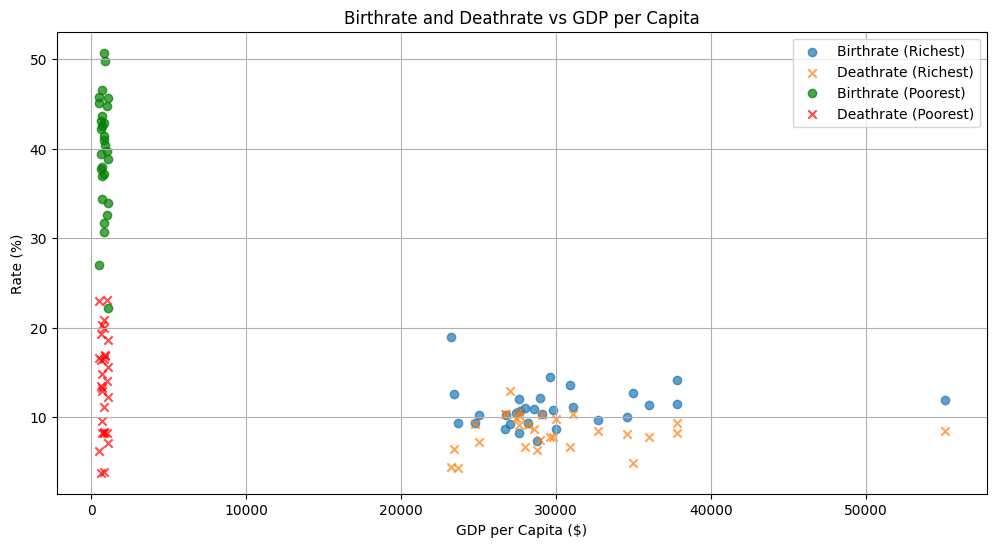

In [53]:
# plotting data
plt.figure(figsize=(12, 6))

# top 30
plt.scatter(richest_30['GDP ($ per capita)'], richest_30['Birthrate'], 
            label="Birthrate (Richest)", alpha=0.7, marker='o')
plt.scatter(richest_30['GDP ($ per capita)'], richest_30['Deathrate'], 
            label="Deathrate (Richest)", alpha=0.7, marker='x')

# less 30
plt.scatter(poorest_30['GDP ($ per capita)'], poorest_30['Birthrate'], 
            label="Birthrate (Poorest)", alpha=0.7, marker='o', color='green')
plt.scatter(poorest_30['GDP ($ per capita)'], poorest_30['Deathrate'], 
            label="Deathrate (Poorest)", alpha=0.7, marker='x', color='red')

plt.title('Birthrate and Deathrate vs GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 2

In [54]:
data = pd.read_excel("airports.xlsx")

In [55]:
# make sure that long and lang is numerical
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

In [56]:
# drop NA
valid_airports = data.dropna(subset=['Latitude', 'Longitude'])

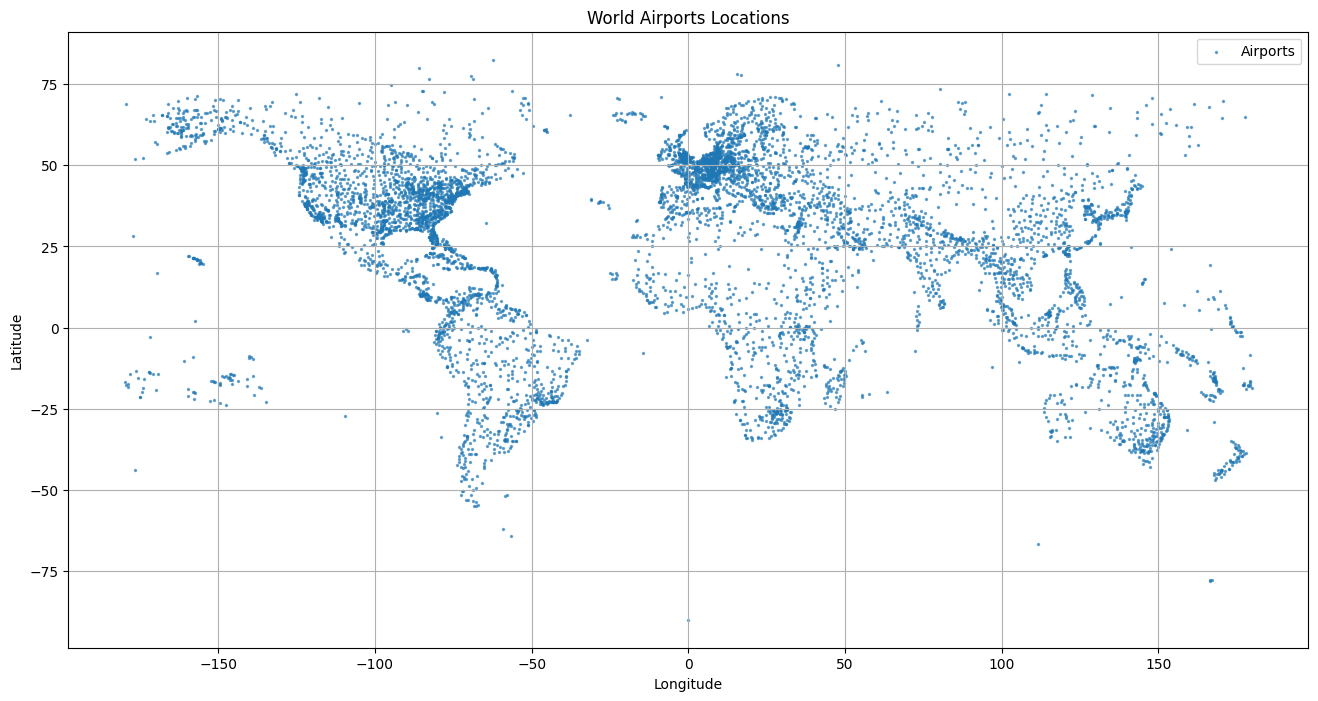

In [57]:
# plot
plt.figure(figsize=(16, 8))
plt.scatter(
    valid_airports['Longitude'], 
    valid_airports['Latitude'], 
    s=2, alpha=0.6, label='Airports'
)
plt.title('World Airports Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

# Zadanie 3

In [58]:
# same data as before, converting feets to meters
data['Altitude in feet'] = pd.to_numeric(data['Altitude in feet'], errors='coerce')
data['Altitude_m'] = data['Altitude in feet'] * 0.3048

In [59]:
# drop NA
valid_airports = data.dropna(subset=['Airport territory', 'Altitude_m'])

In [60]:
lowest_airport_by_country = valid_airports.groupby('Airport territory')['Altitude_m'].min().reset_index()

# sorting
highest_lowest_altitudes = lowest_airport_by_country.sort_values(by='Altitude_m', ascending=False).head(10)
print(highest_lowest_altitudes)

    Airport territory  Altitude_m
118           Lesotho   1556.0040
177            Rwanda   1481.0232
34            Burundi    786.9936
232         West Bank    757.4280
219            Uganda    753.4656
203         Swaziland    632.4600
114        Kyrgyzstan    627.2784
26           Botswana    540.1056
126            Malawi    481.5840
197       South Sudan    461.1624


# Zadanie 4